In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler


In [2]:
df1 = pd.read_csv('Part1-Carname.csv')
df2 = pd.read_json('Part1-Car-Attributes.json') 

In [3]:
df1.info


<bound method DataFrame.info of                       car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]>

In [4]:
df1.shape

(398, 1)

In [5]:
df2.info

<bound method DataFrame.info of       mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]>

In [6]:
df2.shape

(398, 8)

In [7]:
df = pd.concat([df1, df2], axis=1, join='inner')
print("Shape: "+str(df.shape))
print("Size: "+str(df.size))
df.head()


Shape: (398, 9)
Size: 3582


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df[0:]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
df.to_csv('final_data.csv', index=False)
df.to_excel('final_data.xlsx')
df.to_json('final_data.json')

In [10]:
data = pd.read_csv('final_data.csv')

In [11]:
data.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool

In [12]:
data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

Let's look at the unique elements of hp to look for discrepancies 

In [13]:
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

When we print out all the unique values in hp, we find that there is '?' which was used as a placeholder for missing values. Lest remove these entries.

In [14]:
data = data[data.hp != '?']

In [15]:
print('?' in data.hp)

False


In [16]:
data.shape

(392, 9)

In [17]:
data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

So we see all entries with '?' as place holder for data are removed. However, we the hp data is still an object type and not float. That is because pandas coerced the entire column as object when we imported the data set due to '?', so lest change that data

In [18]:
data.hp = data.hp.astype('float')
data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

Now everything looks in order so lets continue, let's describe the datase

In [19]:
 data.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


Step 1: Let's look at mpg


In [21]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

<AxesSubplot:xlabel='mpg', ylabel='Density'>

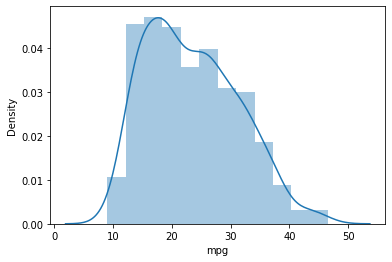

In [22]:
sns.distplot(data['mpg'])

In [23]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Using our seaborn tool we can look at mpg:

Slight of 0,.45
Kurtosis of -0.51

Lets visualise some relationships between these data points, but before we do, we need to scale them to same the same range of [0,1]

In [32]:
scaler = MinMaxScaler()
# transform data
data.iloc[:,2:9]=scaler.fit_transform(data.iloc[:,2:9])


In [33]:
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,buick skylark 320,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,plymouth satellite,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,amc rebel sst,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,ford torino,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
